In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\user\Documents\DataSet\police_killings.csv')

In [3]:
data.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [4]:
data.tail()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
462,William Chapman II,18,Male,Black,April,22,2015,1098 Frederick Blvd,Portsmouth,VA,...,0,25262,27418.0,46166,0.593900,1.0,1.0,35.2,0.152047,0.120553
463,William Dick III,28,Male,Native American,April,4,2015,Bureau of Indian Affairs Rd 66,Tonasket,WA,...,20.2,18470,35608.0,40368,0.882085,1.0,2.0,27.3,0.133650,0.174525
464,William Poole,52,Male,White,March,16,2015,130 Wedowee Ln,Gaston,NC,...,0.3,21175,38200.0,42017,0.909156,2.0,2.0,28.5,0.256150,0.072764
465,Yuvette Henderson,38,Female,Black,February,3,2015,3800 Hollis St,Oakland,CA,...,37.1,26971,63052.0,72112,0.874362,2.0,4.0,23.9,0.069601,0.396476
466,Zaki Shinwary,48,Male,Unknown,January,16,2015,Lake Arrowhead Ave and Great Salt Lake Dr,Fremont,CA,...,12.3,33590,88940.0,72112,1.233359,4.0,5.0,6.1,0.080912,0.435773


In [5]:
data.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

#### Selecting the most relevant columns 

In [6]:
data = data.loc[:,['age', 'gender','raceethnicity','month','day','city','state','lawenforcementagency','cause','armed','pop','share_white',
                'share_black', 'share_hispanic','pov','urate','college']]

In [7]:
data.head()

,age,gender,raceethnicity,month,day,city,state,lawenforcementagency,cause,armed,pop,share_white,share_black,share_hispanic,pov,urate,college
0,16,Male,Black,February,23,Millbrook,AL,Millbrook Police Department,Gunshot,No,3779,60.5,30.5,5.6,14.1,0.097686,0.168510
1,27,Male,White,April,2,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,2769,53.8,36.2,0.5,28.8,0.065724,0.111402
2,26,Male,White,March,14,Kenosha,WI,Kenosha Police Department,Gunshot,No,4079,73.8,7.7,16.8,14.6,0.166293,0.147312
3,25,Male,Hispanic/Latino,March,11,South Gate,CA,South Gate Police Department,Gunshot,Firearm,4343,1.2,0.6,98.8,11.7,0.124827,0.050133
4,29,Male,White,March,19,Munroe Falls,OH,Kent Police Department,Gunshot,No,6809,92.5,1.4,1.7,1.9,0.063550,0.403954


In [8]:
#Returns basic information of each attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   467 non-null    object 
 1   gender                467 non-null    object 
 2   raceethnicity         467 non-null    object 
 3   month                 467 non-null    object 
 4   day                   467 non-null    int64  
 5   city                  467 non-null    object 
 6   state                 467 non-null    object 
 7   lawenforcementagency  467 non-null    object 
 8   cause                 467 non-null    object 
 9   armed                 467 non-null    object 
 10  pop                   467 non-null    int64  
 11  share_white           467 non-null    object 
 12  share_black           467 non-null    object 
 13  share_hispanic        467 non-null    object 
 14  pov                   467 non-null    object 
 15  urate                 4

#### Changing the data types of age, poverty and umemployment rate

In [9]:
data['pov']=data['pov'].replace('-',np.nan)

In [10]:
data['pov']=pd.to_numeric(data['pov']).astype('float')

In [11]:
data['urate']=pd.to_numeric(data['urate']).astype('float')

#### Checking the the total number of null values in each column 

In [12]:
data.isna().sum()

age                     0
gender                  0
raceethnicity           0
month                   0
day                     0
city                    0
state                   0
lawenforcementagency    0
cause                   0
armed                   0
pop                     0
share_white             0
share_black             0
share_hispanic          0
pov                     2
urate                   2
college                 2
dtype: int64

In [13]:
data.drop_duplicates(inplace=True)
data.head()

,age,gender,raceethnicity,month,day,city,state,lawenforcementagency,cause,armed,pop,share_white,share_black,share_hispanic,pov,urate,college
0,16,Male,Black,February,23,Millbrook,AL,Millbrook Police Department,Gunshot,No,3779,60.5,30.5,5.6,14.1,0.097686,0.168510
1,27,Male,White,April,2,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,2769,53.8,36.2,0.5,28.8,0.065724,0.111402
2,26,Male,White,March,14,Kenosha,WI,Kenosha Police Department,Gunshot,No,4079,73.8,7.7,16.8,14.6,0.166293,0.147312
3,25,Male,Hispanic/Latino,March,11,South Gate,CA,South Gate Police Department,Gunshot,Firearm,4343,1.2,0.6,98.8,11.7,0.124827,0.050133
4,29,Male,White,March,19,Munroe Falls,OH,Kent Police Department,Gunshot,No,6809,92.5,1.4,1.7,1.9,0.063550,0.403954


In [14]:
data.describe()

,day,pop,pov,urate,college
count,467.000000,467.000000,465.000000,465.000000,465.000000
mean,15.830835,4783.719486,21.111613,0.117399,0.220217
std,8.658970,2374.565749,13.215960,0.069175,0.158347
min,1.000000,0.000000,1.100000,0.011335,0.013547
25%,8.000000,3357.500000,10.900000,0.068592,0.106167
50%,16.000000,4447.000000,18.200000,0.105181,0.169544
75%,23.000000,5815.500000,28.700000,0.140833,0.284542
max,31.000000,26826.000000,79.200000,0.507614,0.828070


In [15]:
#Frequency of gender affected
data['gender'].value_counts()

Male      445
Female     22
Name: gender, dtype: int64

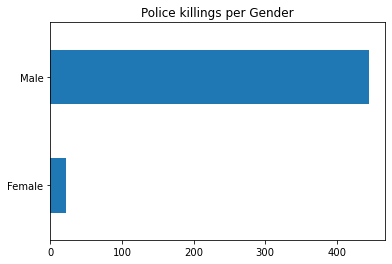

In [16]:
data['gender'].value_counts().sort_values().plot(kind='barh')
plt.title('Police killings per Gender')
plt.show()

In [17]:
#Returns the fequency of the causes of victim deaths
data['cause'].value_counts()

Gunshot              411
Taser                 27
Death in custody      14
Struck by vehicle     12
Unknown                3
Name: cause, dtype: int64

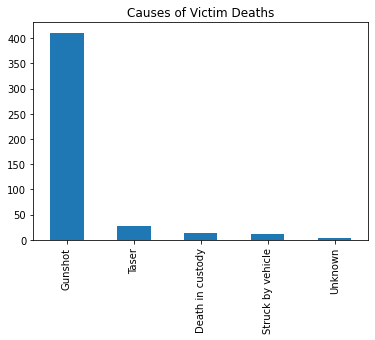

In [18]:
data['cause'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Causes of Victim Deaths')
plt.show()

In [19]:
#Returns the frequency of race affected 
data['raceethnicity'].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

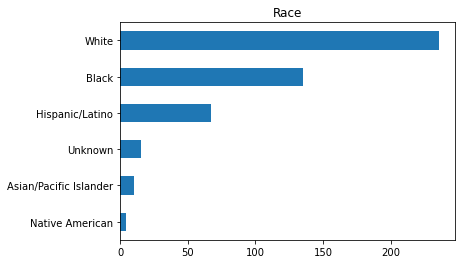

In [20]:
data['raceethnicity'].value_counts().sort_values().plot(kind='barh')
plt.title('Race')
plt.show()

In [21]:
data['lawenforcementagency'].value_counts().head(10)

Los Angeles Police Department                  10
Oklahoma City Police Department                 5
Los Angeles County Sheriff's Department         5
US Marshals Service                             5
Indianapolis Metropolitan Police Department     4
Fort Worth Police Department                    4
New York Police Department                      4
Phoenix Police Department                       4
US Border Patrol                                3
San Francisco Police Department                 3
Name: lawenforcementagency, dtype: int64

In [22]:
#Returns the top 10 states with high rate of police killings
data['state'].value_counts().head(10)

CA    74
TX    46
FL    29
AZ    25
OK    22
GA    16
NY    14
CO    12
NJ    11
WA    11
Name: state, dtype: int64

In [23]:
data[data['raceethnicity']=='White']['state'].value_counts().head(10)

CA    27
TX    15
OK    14
AZ    14
FL    14
NY     7
OR     7
NC     7
MI     7
GA     6
Name: state, dtype: int64

In [24]:
data[data['raceethnicity']=='Black']['state'].value_counts().head(10)

CA    14
FL    12
TX    10
MD     9
GA     8
OK     7
VA     6
LA     6
NY     6
MO     5
Name: state, dtype: int64

In [25]:
data[data['raceethnicity']=='White']['cause'].value_counts()

Gunshot              214
Taser                  9
Struck by vehicle      8
Death in custody       4
Unknown                1
Name: cause, dtype: int64

In [26]:
data[data['raceethnicity']=='Black']['cause'].value_counts()

Gunshot              110
Taser                 13
Death in custody       8
Struck by vehicle      3
Unknown                1
Name: cause, dtype: int64

In [27]:
data.value_counts?

In [28]:
data.groupby('raceethnicity')['cause'].value_counts()
#.value_counts(subset=['cause'])

raceethnicity           cause            
Asian/Pacific Islander  Gunshot                7
                        Taser                  2
                        Struck by vehicle      1
Black                   Gunshot              110
                        Taser                 13
                        Death in custody       8
                        Struck by vehicle      3
                        Unknown                1
Hispanic/Latino         Gunshot               64
                        Death in custody       1
                        Taser                  1
                        Unknown                1
Native American         Gunshot                2
                        Death in custody       1
                        Taser                  1
Unknown                 Gunshot               14
                        Taser                  1
White                   Gunshot              214
                        Taser                  9
                        Str

In [29]:
#Returns the frequency of arms possed by victim killed
data['armed'].value_counts()

Firearm               230
No                    102
Knife                  68
Other                  26
Vehicle                18
Non-lethal firearm     14
Unknown                 7
Disputed                2
Name: armed, dtype: int64

In [30]:
#Returns the total population per race
data.groupby('raceethnicity')['pop'].sum()

raceethnicity
Asian/Pacific Islander      35301
Black                      568802
Hispanic/Latino            329278
Native American             20524
Unknown                     81985
White                     1198107
Name: pop, dtype: int64

In [31]:
#Returns hte no of times killings happened per city 
data['city'].value_counts()

Los Angeles      9
Phoenix          6
Houston          6
Oklahoma City    4
San Francisco    4
                ..
Trenton          1
San Manuel       1
Wilmore          1
Beacon           1
Draper           1
Name: city, Length: 364, dtype: int64

In [32]:
data['month'].value_counts()

March       114
April        96
January      90
February     84
May          81
June          2
Name: month, dtype: int64

In [33]:
data['age'].unique()

array(['16', '27', '26', '25', '29', '22', '35', '44', '31', '76', '40',
       'Unknown', '23', '39', '54', '24', '57', '21', '42', '36', '49',
       '48', '33', '41', '45', '32', '18', '34', '62', '43', '50', '46',
       '28', '51', '67', '53', '30', '38', '56', '37', '58', '47', '60',
       '17', '59', '64', '63', '77', '19', '52', '20', '69', '74', '71',
       '72', '61', '87', '55', '68', '83', '75'], dtype=object)

In [34]:
data['age']=data['age'].replace('Unknown', np.nan)

In [35]:
data.dropna(subset=['age'],inplace=True)

In [36]:
data['age']=pd.to_numeric(data['age']).astype('int64')

In [37]:
def age_groups(age):
    if age<=24:
        return 'Gen Z'
    elif age>=25 and age<=40:
        return 'Millennials'
    elif age>=41 and age<=56:
        return 'Gen X'
    elif age>=57 and age<=75:
        return 'Baby Boomers'
    else:
        return 'Old'
data['AgeGroups']= data['age'].apply(age_groups)
data['AgeGroups'].value_counts()


Millennials     229
Gen X           116
Gen Z            74
Baby Boomers     40
Old               4
Name: AgeGroups, dtype: int64

In [38]:
data.groupby('AgeGroups')['armed'].value_counts()

AgeGroups     armed             
Baby Boomers  Firearm                17
              No                     15
              Knife                   4
              Non-lethal firearm      2
              Disputed                1
              Other                   1
Gen X         Firearm                65
              No                     23
              Knife                  14
              Other                   5
              Non-lethal firearm      4
              Vehicle                 4
              Unknown                 1
Gen Z         Firearm                33
              Knife                  18
              No                     12
              Other                   5
              Non-lethal firearm      3
              Vehicle                 2
              Unknown                 1
Millennials   Firearm               113
              No                     49
              Knife                  30
              Other                  14
       

## Questioning of the data

Could poverty be a factor that led to high rate of police killings?

In [39]:
#Returns the top 10 state with the high poverty rate
data.groupby('state')['pov'].sum().sort_values(ascending=False).head(10)

state
CA    1516.6
TX     927.3
FL     668.3
AZ     589.3
OK     515.3
LA     365.4
MO     326.8
GA     292.3
NC     282.4
WA     268.8
Name: pov, dtype: float64

Could Umeployment Rate be a factor?

In [40]:
data.groupby('state')['urate'].sum().sort_values(ascending=False).head(10)

state
CA    9.356941
FL    4.031929
TX    3.825384
AZ    3.050823
GA    1.973049
OK    1.959362
NC    1.852623
MO    1.848852
MD    1.811807
IL    1.729155
Name: urate, dtype: float64

Could population be a factor that led to high rate of police killings?

In [41]:
data.pivot_table(index='state',values=['pop'], aggfunc=np.sum).sort_values(by='pop',ascending=False)

,pop
state,
CA,372999
TX,216944
FL,177150
AZ,111678
GA,88187
OK,86565
NJ,64324
NY,61268
WA,52585


In [42]:
#Returns the population rate for the age groups affected
data.pivot_table(index='AgeGroups',values='pop', aggfunc=np.sum)

,pop
AgeGroups,
Baby Boomers,181952
Gen X,533593
Gen Z,344145
Millennials,1126672
Old,15851


In [43]:
#Returns population rate per race ethnicity
data.pivot_table(index='raceethnicity',values='pop', aggfunc=np.sum)

,pop
raceethnicity,
Asian/Pacific Islander,35301
Black,568802
Hispanic/Latino,318050
Native American,20524
Unknown,68281
White,1191255


In [44]:
#Returns the month and day with the highest number of victims killed
data.groupby('month')['day'].value_counts().idxmax()

('March', 17)